# <center>Get a used car for fair price</center>

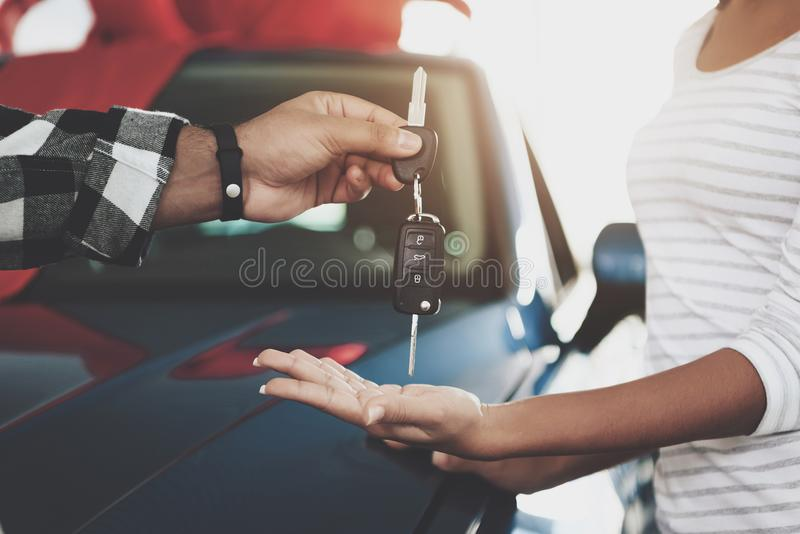

## 1. Introduction

The auto industry is changing rapidly and car prices are only going up. So to speak, new cars are getting costlier each year, making them a very high value purchase for the common man. And quite ironically, the average life span of a car is going down despite the steady rise in prices, which brings in good news for potential used car buyers! Thanks to manufacturers launching newer versions of their models sooner now as compared to a few years ago, more and more modern cars are now entering the used car market, which makes it easy for you to make a good buy without having to bust your wallet.

A used car in fact makes more sense for first time buyers upgrading from two-wheelers or public transportation, or for that matter, someone looking to buy a second set of wheels in the family. Now here’s five reasons clarifying why buying a used car instead of a new car is more sensible.

### 1.1 Reasons to buy a used car

**1: Save money and you can even upgrade your segment**
All it takes is less than a minute for a new car, straight out from a showroom, to lose 8-10% of its purchase price as it enters used car territory. Going for used purchase means you have to pay a lot less than the original value of the car (depending on year of manufacture and kilometres done) which means you can save some serious money.

**2: Slower depreciation means you lose less money**
Every car undergoes depreciation but a used car has an upper hand for the same when compared to a new car. It depreciates at a slower rate when compared to a brand new car. Let’s find out how: Depreciation of a vehicle is at its peak during the first three years of purchase. When you are buying a used car, you will obviously purchase it at a price which has already gone under major depreciation.

**3: Insurance is cheaper**
Getting your used car insured will cost you a lot less as compared to a new car. That along with soaring additional taxes and other clauses makes a new car quite expensive.

**4: Tension free drive 24x7**
A used car comes with its own perks. The primary benefit has to be the feeling of driving tension-free, without the jitters of getting that first dent or scratch, something only a brand new car is prone to.

## 2. Problem Statement

The objective of this project is to 
> 1. Deploy a machine learning model that predicts the selling price of used car<br>
> 2. Developing front end part and implementing this project live using heroku app<br>

## 3. Data Definition

### 3.1 Dataset Description

This dataset contains information about used cars listed on www.cardekho.com This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset is as follows:

1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

### 3.2 Loading libraries and dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset and assign it to a variable
vehicles=pd.read_csv("datasets/car data.csv")

### 3.3 Exploratory data analysis

In [3]:
#use the 'head' method to show the first five rows of the table as well as their names. 
vehicles.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#Using info() method to show a concise summary of our dataframe printing columns' 
#data-type,index data-type and number of non-null values
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#Looking at the missing/null values in our dataset!
#.T method is similar to transpose matrix
print(vehicles.describe().T)

               count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115     0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0  


**We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!**

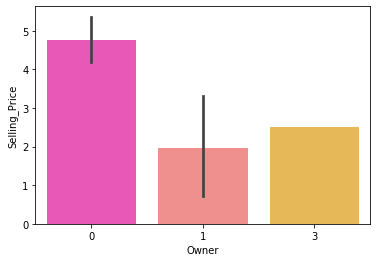

In [10]:
#Let's examine the selling price based on the type of owner
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

**It seems that the vehicles belonging to owner 0 have the highest selling price**

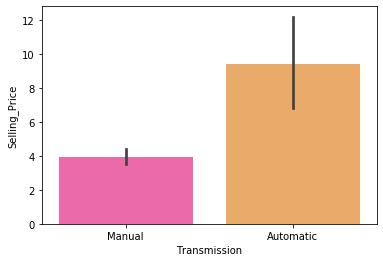

In [11]:
#Let's examine the selling price for manual and automatic vehicles!
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

**We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.**

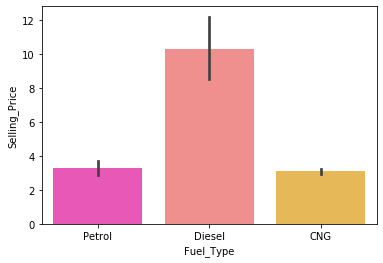

In [12]:
#Let's examine the selling price based on different types of engine fuel!
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

**Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles**

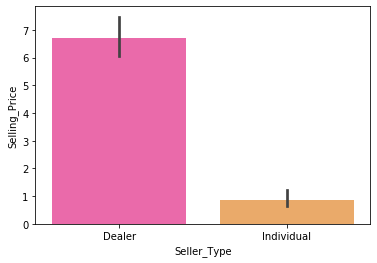

In [13]:
#Let's get an idea of the selling price for a vehicle sold by a Dealer vs Individual!
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

**Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !**

<Figure size 720x720 with 0 Axes>

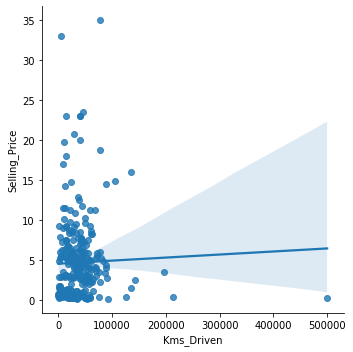

In [14]:
#Visualizing the relationship between Target Variable[Selling price] against Kms
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

**The selling price is found to be higher for vehicles with less kms covered under the belt!**

<Figure size 720x720 with 0 Axes>

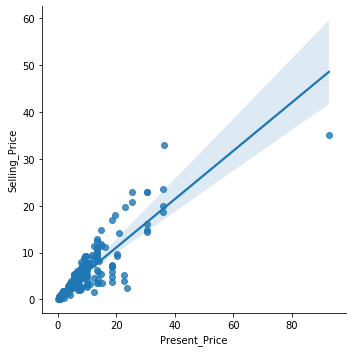

In [15]:
#Visualizing the relationship between Target Variable[Selling price] and present price
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

**Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.**

In [16]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']

#check out the newly added column
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


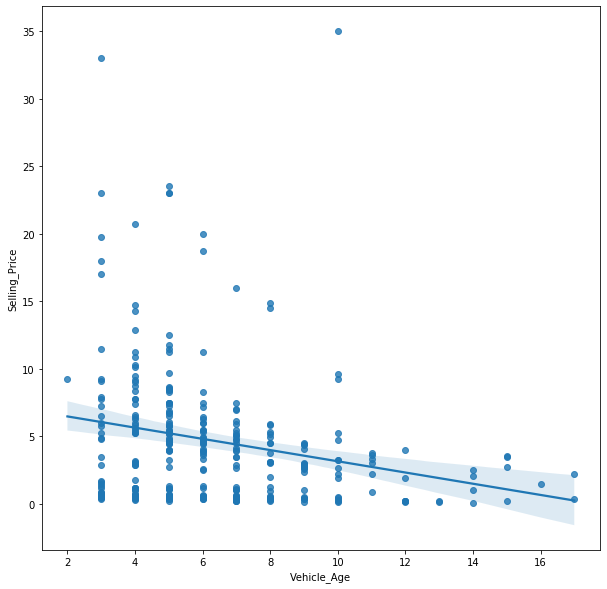

In [17]:
#Visualizing the relationship between Target Variable[Selling price] and age of the car
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

**It seems the selling price decreases overall for older/ageing vehicles!**

## 4. Feature Engineering

In [18]:
#We shall convert categorical features to numeric type!

#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


**Observations**:
1. Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
2. Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
3. Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer and '0' Seller_Type_Individual.

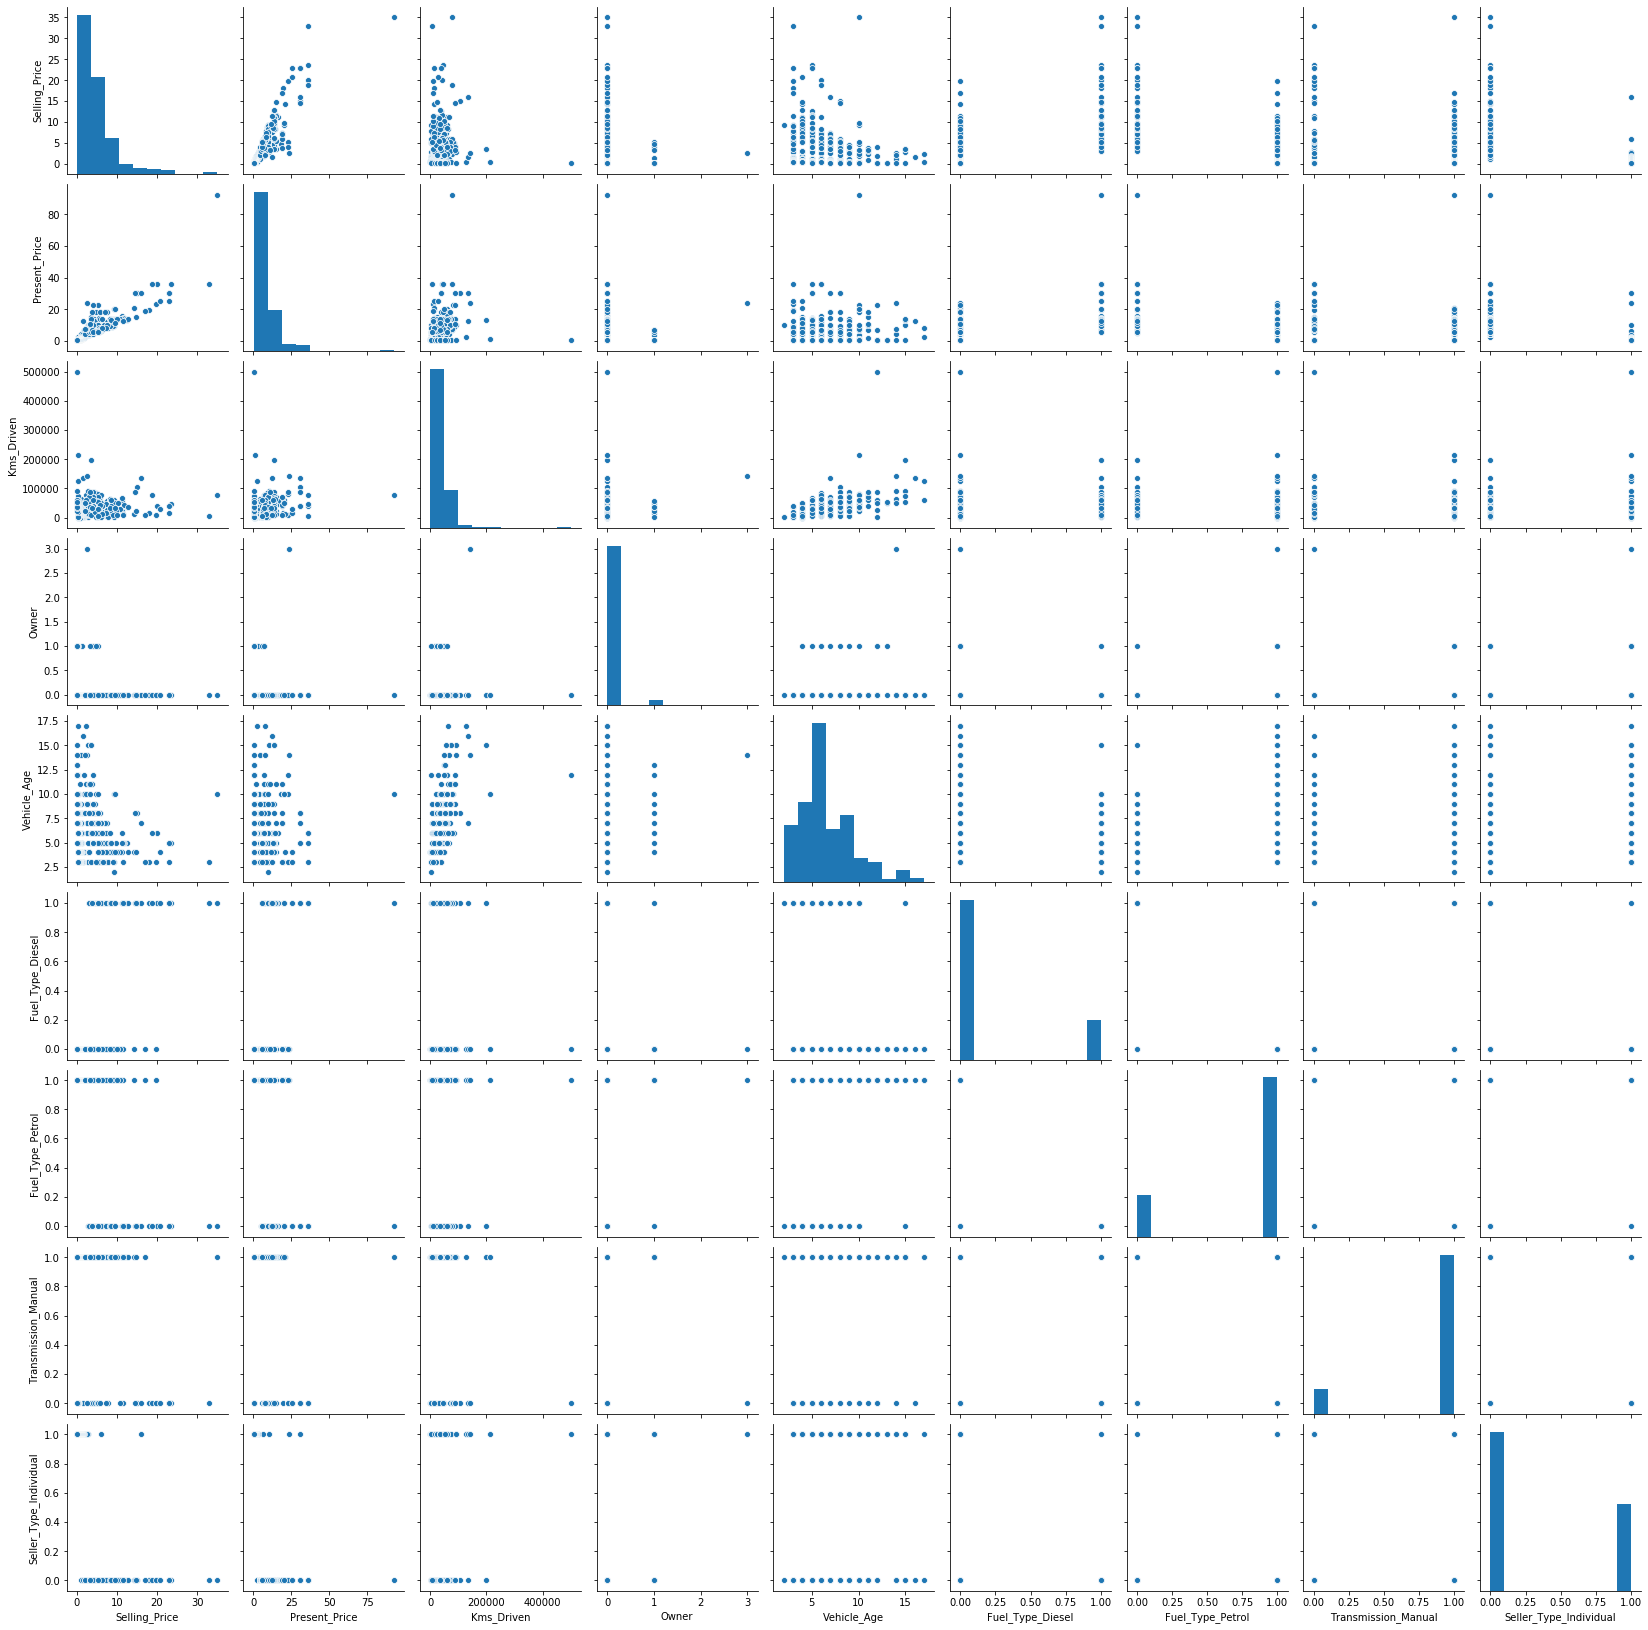

In [19]:
#Visualizing Correlations amongst the features
sns.pairplot(vehicles)


1. The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.
2. Selling price seems to be considerably correlated with the Present Price feature.

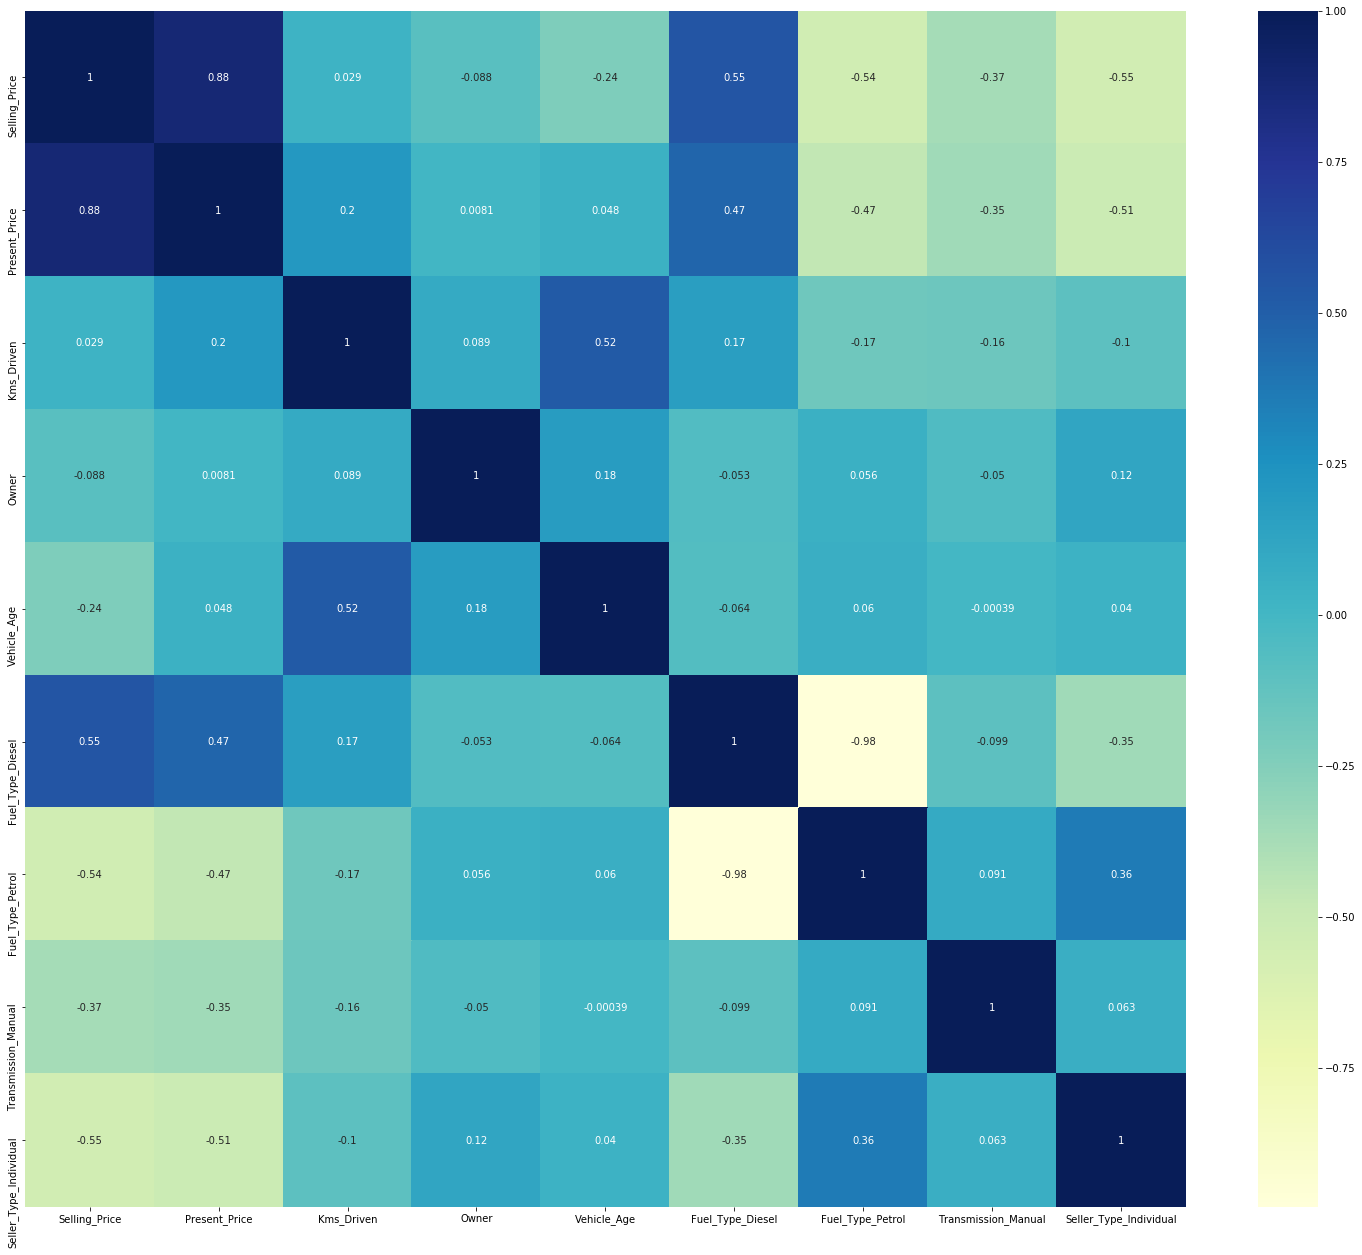

In [20]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")

In [21]:
#Dropping the car name as it is not useful in prediction
vehicles.drop(['Car_Name'], axis=1, inplace=True)

#Checking the final dataset
vehicles.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


### 3.4 Feature Importance

In [23]:
#dividing the data into x and y variables
x = vehicles.iloc[:,1:]
y = vehicles.iloc[:,0]

In [25]:
#check x data
print(x.head())
print("\n")
#check y data
print(y.head())

   Present_Price  Kms_Driven  Owner  Vehicle_Age  Fuel_Type_Diesel  \
0           5.59       27000      0            6                 0   
1           9.54       43000      0            7                 1   
2           9.85        6900      0            3                 0   
3           4.15        5200      0            9                 0   
4           6.87       42450      0            6                 1   

   Fuel_Type_Petrol  Transmission_Manual  Seller_Type_Individual  
0                 1                    1                       0  
1                 0                    1                       0  
2                 1                    1                       0  
3                 1                    1                       0  
4                 0                    1                       0  


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [26]:
# Feature Importance from ensemble module of sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
#check the feature importances probabilities
model.feature_importances_

array([0.3692072 , 0.04259046, 0.00042484, 0.07579255, 0.22957362,
       0.01312097, 0.14061966, 0.12867071])

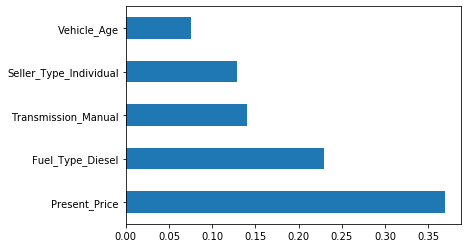

In [28]:
# Plot the Grpah ofFeature Importances for better visualizaton
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**Observation**:
1. Present_price feature has highest feature importance followed by fuel_type_diesel, transmission_manual, seller_type_individual

## 4. Model Building and Evaluation

### 4.1 Model building

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [31]:
x_train.shape

(240, 8)

In [32]:
x_test.shape

(61, 8)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [34]:
## setting Hyperparameters for randomised search cv

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider every split
max_features = ['auto','sqrt']

# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=6)]

# Minimum number of samples required to split the node
min_samples_split = [2,5,10,15,100]

# Minimum number of Samples at each leaf node
min_samples_leaf = [1,2,5,10]

In [35]:
#create a random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10, cv=5, verbose=2,n_jobs=1, random_state=42)

In [37]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### 4.2 Evaluation

In [39]:
predictions = rf_random.predict(x_test)
predictions

array([ 2.70456858, 11.98386364,  2.69758135,  2.79474476,  1.25194996,
        0.83720929, 18.74060591,  0.28271381,  5.76969988, 10.06659646,
        3.20567956,  0.3758118 ,  7.94524621,  0.43233741,  0.46329282,
        0.52015258,  8.38183168,  0.51560282,  5.00114979,  6.54056943,
        5.93151301,  3.05459062,  7.47412521,  2.73879171,  0.28576068,
        0.65072272, 21.53731969,  4.64775679,  7.63581526,  6.12972701,
        1.16634788,  5.84498569,  1.20926126,  2.54290817,  5.80232527,
        8.10225011,  2.7549026 ,  4.69274297,  5.02710002,  0.29112218,
        0.37514467,  7.24702031,  5.18994031,  2.38527303,  2.71027056,
        4.7306882 ,  5.95128181,  2.77431768,  3.53276367,  0.61675216,
        1.4236759 ,  2.69758135,  2.8571    ,  3.05852752,  7.5975663 ,
        1.15669279, 13.91600762,  0.36995929,  2.80623274,  5.02662389,
        4.97474242])

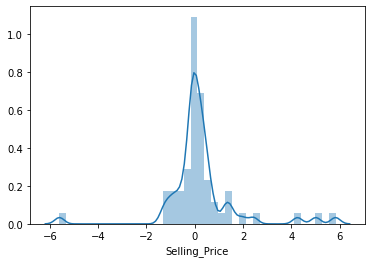

In [40]:
#lets see how the values between predictions and test values are distributed
sns.distplot(y_test-predictions)

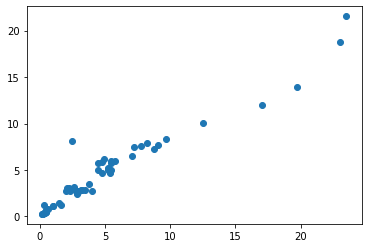

In [41]:
plt.scatter(y_test, predictions)

In [42]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
mean_absolute_error = mean_absolute_error(y_test, predictions)
print("MAE: ",mean_absolute_error)
mean_squared_error = mean_squared_error(y_test, predictions)
print("MSE: ",mean_squared_error)
R2_score = r2_score(y_test, predictions)
print("R2 Score: ",R2_score)

MAE:  0.7928720783557707
MSE:  2.2558641324271305
R2 Score:  0.9137107076717781


## 6. Results and Discussions

In [45]:
df5 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions})
df5.head()

,Real Values,Predicted Values
239,2.00,2.704569
97,17.00,11.983864
203,2.95,2.697581
220,3.50,2.794745
102,1.65,1.251950


1. The R2_Score of the model is 0.91 which is better
2. The Mean sqaured error we got is 2.25 which is optimised value

## 7. Conclusions

1. From the r2_score value of the above model, we can say that this model has got better performance and can be implemented in live without any hyperparameter tuning
2. We can also say that this model predicts selling price based on present price and other features much better 

## 8. Exporting

In [46]:
#lets save this model using pickle
import pickle

#Open a file where we want to store this model
file = open("random_forest_regression_model.pkl", "wb")

#dump that information to that file
pickle.dump(rf_random, file)